### Orr-Sommerfeld eqs - cylinder flow 

    data = https://www.ece.umn.edu/users/mihailo/software/dmdsp/download.html

In [10]:
from scipy.io import loadmat
import numpy as np

podaci = loadmat('C:\\Users\\dimotela\\Desktop\\DMD\\dmdsp\\codes\\channel-orr-sommerfeld\\channel.mat')

# Display the variable names in the .mat file
print(podaci.keys())

dict_keys(['__header__', '__version__', '__globals__', 'dT', 'Eos', 'S', 'V', 'UstarX1'])


In [38]:
dt = np.array(podaci['dT'][0,0])
os = podaci['Eos']
s=podaci['S']
v=podaci['V']
#podaci['UstarX1'].shape

In [46]:
podaci2 = loadmat('C:\\Users\\dimotela\\Desktop\\DMD\\dmdsp\\codes\\channel-orr-sommerfeld\\x0.mat')

In [57]:
x0=podaci2['x0']

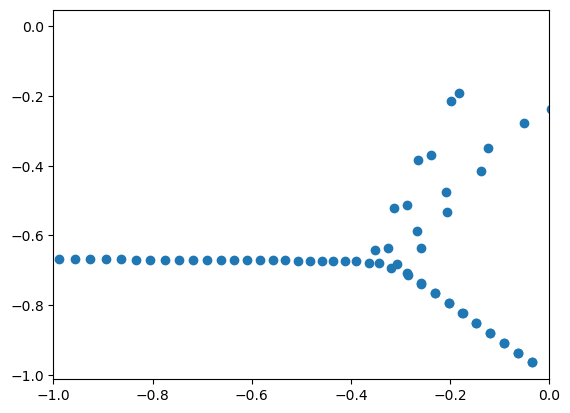

In [60]:
import matplotlib.pyplot as plt


plt.scatter(np.real(os), np.imag(os))
plt.xlim((-1,0))
plt.show()